# 1D Kalman Filter

### Prediction
| <font size="5">Equation &nbsp;&nbsp; </font> | <font size="5">Implementation</font> | <font size="5">Kalman Filter</font> |
| --- | --- | --- |
| $\LARGE \bar{x} = x + f_{x}$ | $\LARGE \begin{align}
\bar{\mu} &= \mu + \mu_{f_{x}}  \\
\bar{\sigma}^2 &= \sigma^{2} + \sigma^{2}_{f_{x}}
\end{align}$ | $\LARGE \begin{align}
\bar{x} &= x + dx \\
\bar{P} &= P + Q
\end{align}$|

### Update

| <font size="5">Equation &nbsp;&nbsp;&nbsp; </font> | <font size="5">Implementation</font> | <font size="5">Kalman Filter</font> |
| --- | --- | --- |
| $\LARGE x = \lvert \lvert L\bar{x}\lvert \lvert $ | $\LARGE \begin{align}
y &= z - \bar{\mu}  \\
K &= \frac{\bar{\sigma}^{2}}{\bar{\sigma}^2 + \sigma_{z}^{2}} \\
\mu &= \bar{\mu} + Ky \\
\sigma^{2} &= \frac{\bar{\sigma}^{2}\sigma_{z}^{2}}{\bar{\sigma}^{2} + \sigma_{z}^{2}} 
\end{align}$ | $\LARGE \begin{align}
y &= z - \bar{x} \\
K &= \frac{\bar{P}}{\bar{P} + R} \\
x &= \bar{x} + Ky \\
P &= (1 - K)\bar{P}
\end{align}$|



$
\Large 
\begin{align}
\bar{x} &: State \; mean \\
\bar{P} &: State \; variance \\
dx &: Movement \; mean \\
Q &: Movement \; variance 
\end{align}
$

In [8]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
gaussian = namedtuple('Gaussian', ['mean', 'var'])
def update(prior, measurement):
    x, P = prior
    z, R = measurement
    
    # Residual
    y = z - x
    
    # Kalman Gain
    K = P/(P + R)
    
    # Posterior
    x = x + K*y
    
    # Posterior variance
    P = (1 - K)*P
    return gaussian(x, P)
def predict(posterior, movement):
    x, P = posterior
    dx, Q = movement
    
    x = x + dx
    P = P + Q
    return gaussian(x, P)
def volt(voltage, std):
    return voltage + (np.random.randn() * std)

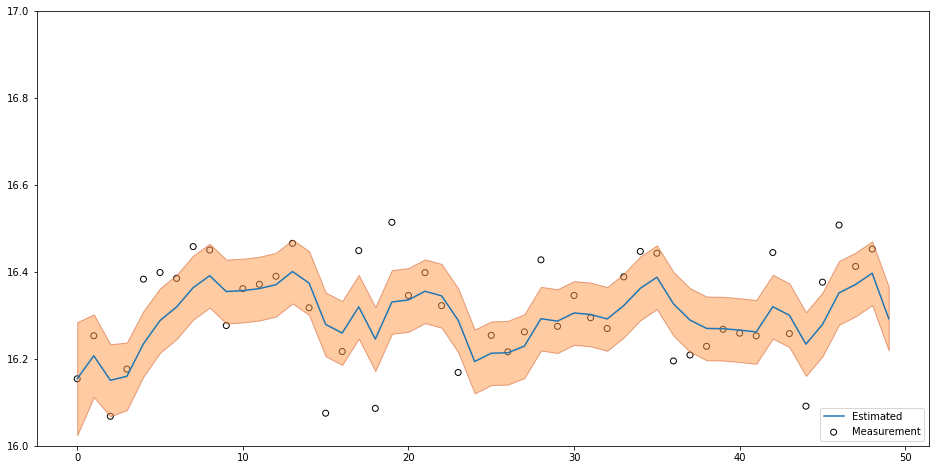

In [43]:
temp_change = 0 
voltage_std = 0.13
process_var = 0.05 ** 2
actual_voltage = 16.3
x = gaussian(25, 1000)
process_model = gaussian(0, process_var)

N = 50
zs = [volt(actual_voltage, voltage_std) for i in range(N)]
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std ** 2))
    ps.append(x.var)
    estimates.append(x.mean)

plt.figure(figsize = (16, 8))
plt.scatter(range(len(zs)) ,zs, edgecolor = 'k', facecolor = 'none', marker = 'o', label = 'Measurement')
plt.plot(range(len(estimates)),estimates, label = 'Estimated')
plt.fill_between(range(len(estimates)), np.array(estimates) + np.sqrt(np.array(ps)), 
                 np.array(estimates) - np.sqrt(np.array(ps)),
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.legend(loc = 4)
plt.ylim(16, 17)
plt.show()



# 2D Kalman Filter

## Predict

$
\Large
\begin{align}
\bar{\textbf{x}} &= \textbf{Fx} + \textbf{Bu} \\
\bar{\textbf{P}} &= \textbf{FPF}^{T} = COV(\textbf{Fx}) + \textbf{Q} 
\end{align}
$

## Update
$
\Large
\begin{align}
\textbf{S} &= \textbf{H}\bar{\textbf{P}}\textbf{H}^{T} + \textbf{R} \\
\textbf{K} &= \bar{\textbf{P}}\textbf{H}^{T}\textbf{S}^{-1} \\
\textbf{y} &= \textbf{z} - \textbf{H}\bar{\textbf{x}} \\
\textbf{x} &= \bar{\textbf{x}} + \textbf{Ky} \\
\textbf{P} &= (\textbf{I} - \textbf{KH})\bar{\textbf{P}}
\end{align}
$

## Predict
$
\Large
\begin{align}
\bar{\textbf{x}} &: Estimate state (prior) \\
\textbf{F} &: Process function \\
\textbf{B} &: Control function \\
\textbf{u} &: Control input \\
\textbf{Q} &: noise covaruabce 
\end{align}
$

## Update
$
\Large
\begin{align}
\textbf{H} &: Measurement\;function \\
\textbf{R} &: measurement\;covariance \\
\textbf{y} &: Residual \\
\textbf{Q} &: noise\;covariance \\
\textbf{x} &: Predicted\;state (posterior) 
\end{align}
$

In [ ]:
def update():
    return
def 2D_filter(x, P, R, Q = 0, dt =1.0):
    kf = KalmanFilter(dim_x = 2, dim_z = 1)
    kf.x = np.array([x[0], x[1]])
    kf.F = np.array([[1, dt],
                     [0, 1]])
    kf.H = np.array([[1.0, 0.0]])
    kf.R = kf.R * R
    
    if np.isscalar(P):
        kf.P = kf.P *P
    else:
        kf.P[:] = P
    if np.isscalar(Q):
        kf.Q = Q_discrete_white_noise(dim = 2, dt =dt, var = Q)
    else:
        kf.Q[:] = Q
    return kf

    